# Exercise - Mini Data Analysis Project

Let's do a complete pandas exercise for a mini data analysis project.

This exercise will require us to use much of the knowledge of pandas and even other modules that we have already learned throughout the course.

### What do we have?

We have the 2019 data from a service provider company.

- EmployeeRegistration
- ClientRegistration
- BaseServicesPrestado

Note 1: To read csv files, we have read_csv<br>
Note 2: To read xlsx files (normal excel files, which are not standard csv), we have read_excel

### What do we want to know/do?

1. Total Payroll Value -> What was the total expense on employee salaries by the company? <br>
Suggestion: calculate the total salary of each employee, salary + benefits + taxes, then add up all the salaries

2. What was the company's revenue?<br>
Suggestion: calculate the total revenue of each service and then add up the revenue of all

3. What is the % of employees who have already closed a contract?<br>
Suggestion: in the service database we have the employee who closed each service. But not all the employees that the company has have already closed a service.<br>
. In the employee database we have a list with all the employees<br>
. We want to calculate Qty_Employees_Closed_Service / Qty_Total_Employees<br>
. To calculate the number of employees who closed a service, use the service database and count how many employees there are. But remember, each employee can only be counted once.<br><br>
Tip: if you apply the .unique() method to a variable that is just 1 column of a dataframe, it will delete all duplicate values ​​from that column.<br>
Ex: unicos_colunaA = dataframe['colunaA'].unique() gives you a list with all items in columnA appearing only once. All repeated values ​​in columnA are excluded from the variable unicos_colunaA

4. Calculate the total number of contracts that each area of ​​the company has already closed

5. Calculate the total number of employees per area

6. What is the average monthly ticket (average monthly revenue) of the contracts?<br>
Tip: .mean() calculates the average -> example: media_colunaA = dataframe['colunaA'].mean()

Note: Remember the most common encoding options:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' or encoding='cp1252'

Important Note: If your code gives an error when importing the files:<br>
- CadastroClientes.csv
- CadastroEmployees.csv

Use the separator ";" (semicolon) to resolve

In [82]:
import pandas as pd
employees_df = pd.read_csv(r'CadastroFuncionarios.csv',sep=';', decimal=',')
clients_df = pd.read_csv(r'CadastroClientes.csv',sep=';', decimal=',')
services_df = pd.read_excel(r'BaseServiçosPrestados.xlsx')

display(employees_df)
display(services_df)
display(clients_df)


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo
...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


### Total Payroll

In [83]:
employees_df['total_expenses'] = employees_df['Salario Base'] + employees_df['Impostos'] + employees_df['Beneficios'] + employees_df['VT'] + employees_df['VR']
# display(employees_df)
total_expenses = employees_df['total_expenses'].sum()
print(f'Total Payroll Amount = {total_expenses:,}')

Total Payroll Amount = 2,717,493.22


### Company turnover

In [84]:
company_turnover_df = services_df.merge(clients_df, on='ID Cliente')
company_turnover_df['Total_contract_value'] = company_turnover_df['Valor Contrato Mensal'] * company_turnover_df['Tempo Total de Contrato (Meses)']
company_turnover = company_turnover_df['Total_contract_value'].sum()
print(f"company turnover = {company_turnover:,}")

company turnover = 5,519,160


### % of employees that have already signed a contract

In [85]:
employees_signed_contract = services_df['ID Funcionário'].nunique()
total_number_employees = employees_df['ID Funcionário'].count()
print(f'% of employees that have already signed a contract = {employees_signed_contract/total_number_employees :.2%}')

% of employees that have already signed a contract = 86.84%


### Number of contracts per area of ​​the company

The number of contracts closed by Administrativo is 63
The number of contracts closed by Comercial is 44
The number of contracts closed by Financeiro is 42
The number of contracts closed by Logística is 40
The number of contracts closed by Operações is 48


<Axes: xlabel='Area'>

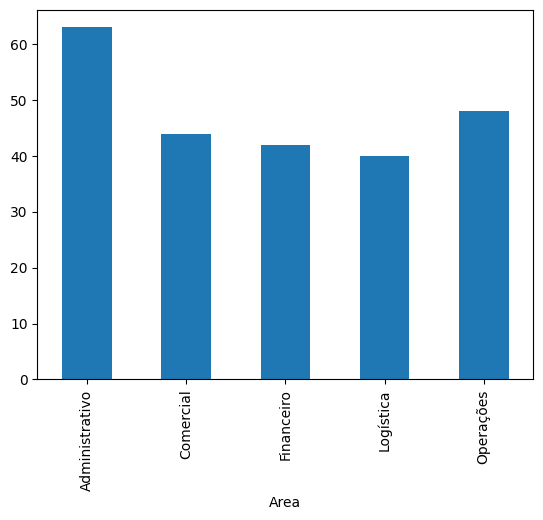

In [86]:
total_contracts_area_company_df = services_df.merge(employees_df, on='ID Funcionário')
# display(total_contracts_area_company_df)
contracts_area_company_df = total_contracts_area_company_df.groupby('Area').size()
# display(contracts_area_company_df)
contracts_area_company_df = total_contracts_area_company_df.groupby('Area')['Area'].count()
# display(contracts_area_company_df)
for area, count in contracts_area_company_df.items():
    print(f'The number of contracts closed by {area} is {count}')
contracts_area_company_df.plot(kind='bar')

### Total number of employees per area

The number of employees in Administrativo is 26
The number of employees in Comercial is 26
The number of employees in Operações is 23
The number of employees in Logística is 21
The number of employees in Financeiro is 18


<Axes: xlabel='Area'>

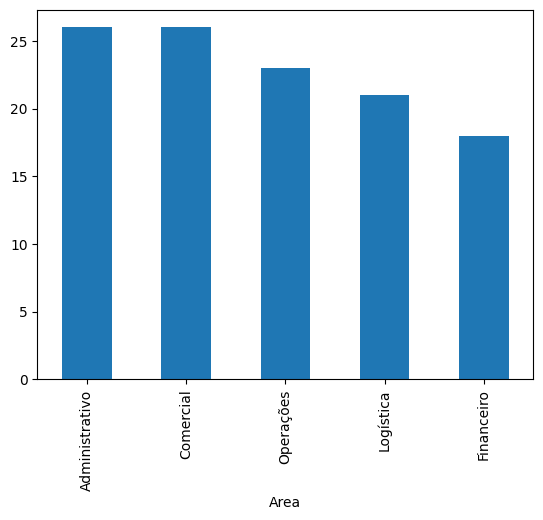

In [89]:
employees_per_area_df = employees_df['Area'].value_counts()
# display(employees_per_area_df)
# employees_per_area_df = employees_df.groupby('Area').size()
# display(employees_per_area_df)

for area, count in employees_per_area_df.items():
    print(f'The number of employees in {area} is {count}')
employees_per_area_df.plot(kind='bar')

### Averange mouthly ticket per contracts

In [88]:
averange_ticket_df = company_turnover_df['Valor Contrato Mensal'].mean()
print(f'The averange mounthly ticket is {averange_ticket_df:,.2f}')

The averange mounthly ticket is 2,438.35
